Rami, Nicola Srour (2025)

Title: Data analysis, Online retailer dataset

In [1]:
# import needed libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# show dataset
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
# describe statistics for dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


/tmp/ipython-input-5-2575397136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countries = sns.countplot(x='Country', data=df, palette=['green', 'red', 'blue', 'yellow'])
/tmp/ipython-input-5-2575397136.py:3: UserWarning: 
The palette list has fewer values (4) than needed (38) and will cycle, which may produce an uninterpretable plot.
  countries = sns.countplot(x='Country', data=df, palette=['green', 'red', 'blue', 'yellow'])


<Axes: xlabel='Country', ylabel='count'>

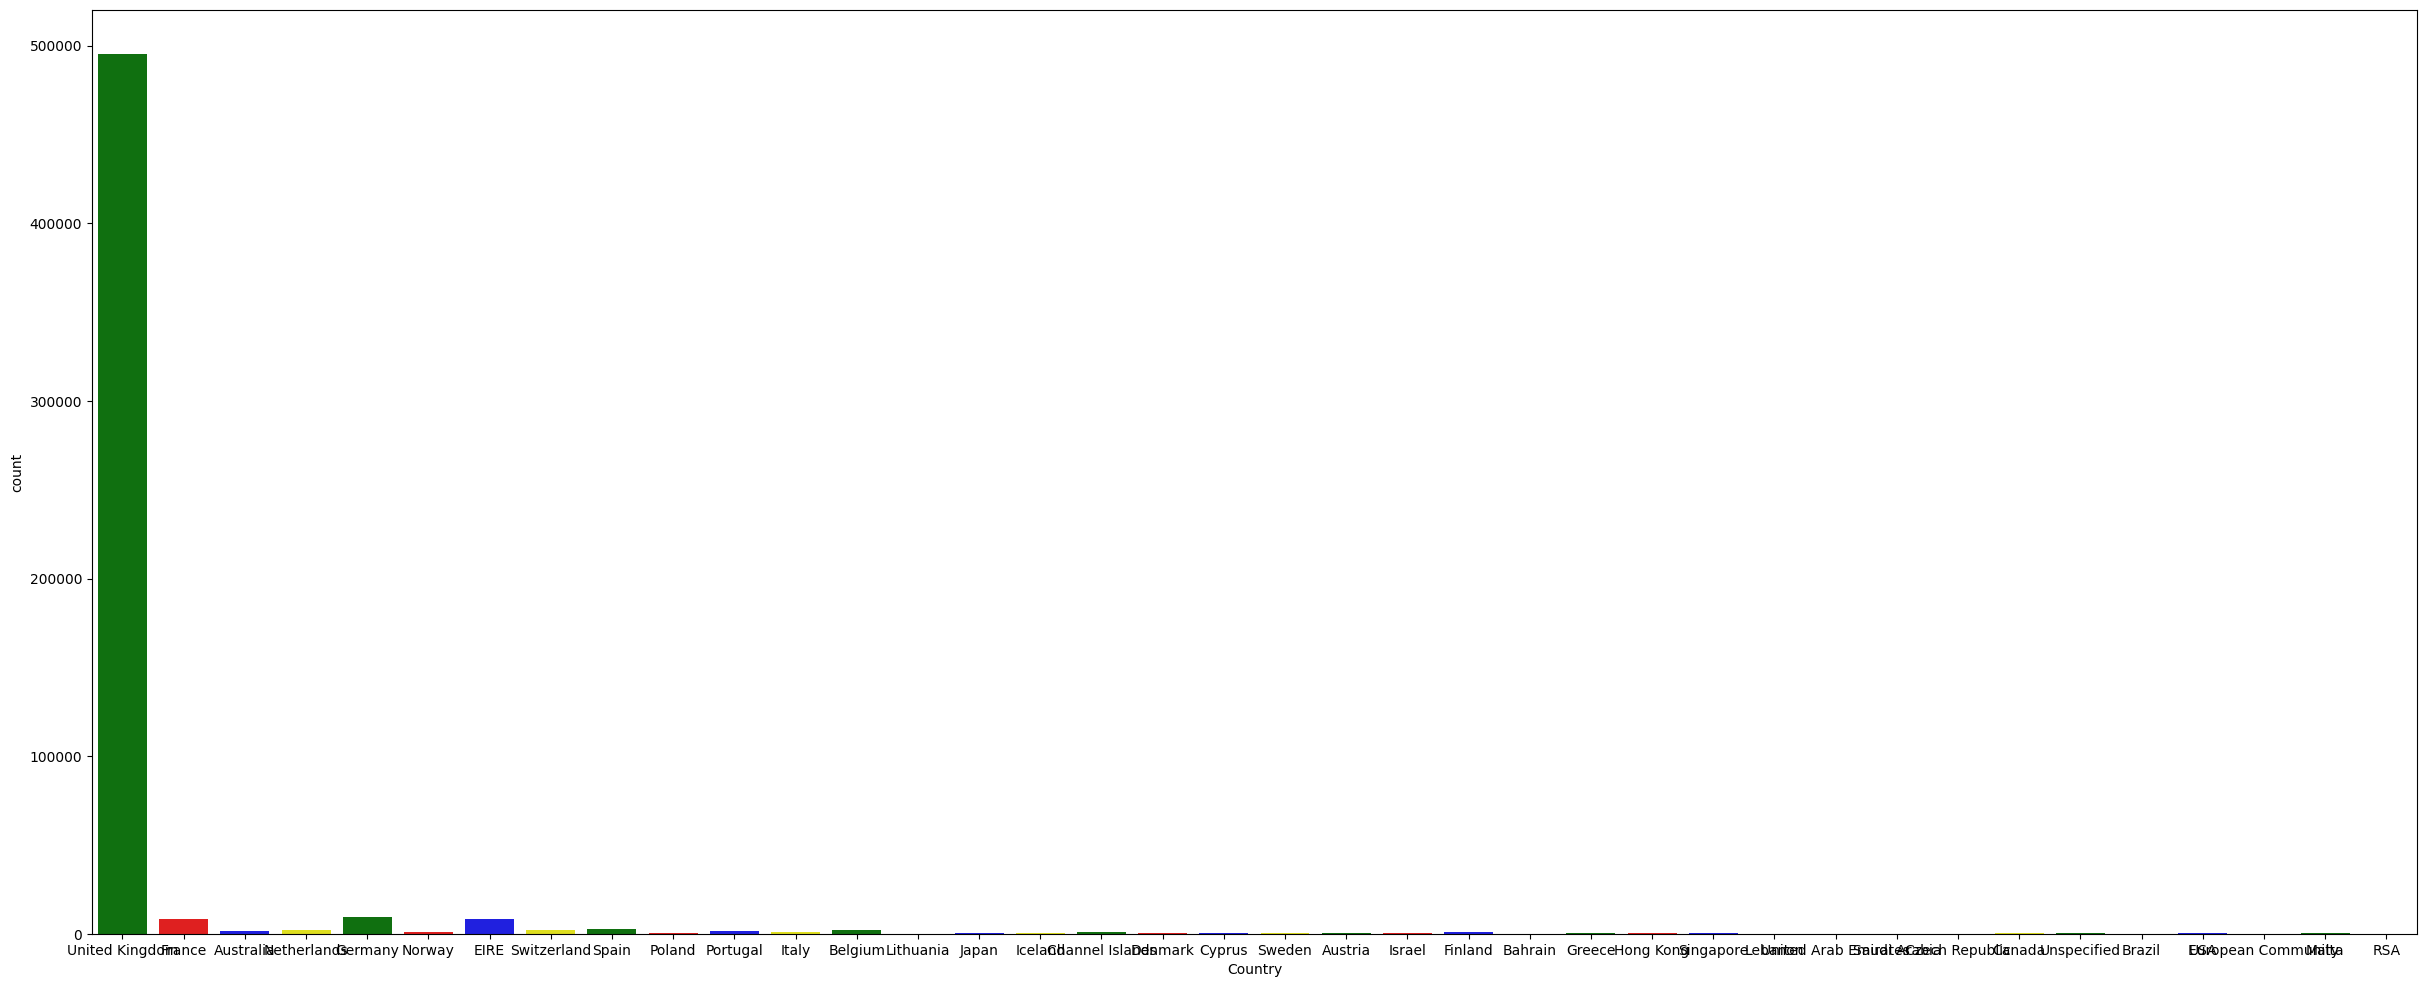

In [5]:
# what countries this dataset includes
plt.figure(figsize=(30,12))
countries = sns.countplot(x='Country', data=df, palette=['green', 'red', 'blue', 'yellow'])
countries

In [6]:
# how many unique countries and what are they
unu = df['Country'].unique()
un = df['Country'].nunique()
print(un)
print(unu)

38
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [7]:
# see how many outliers we have, see number of none outliers
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
iqr = q3 - q1
out = df[(df['Quantity'] < (q1-1.5*iqr)) | (df['Quantity'] > (q3-1.5*iqr))]
num = len(out)
print(num)

539468


<Axes: xlabel='UnitPrice'>

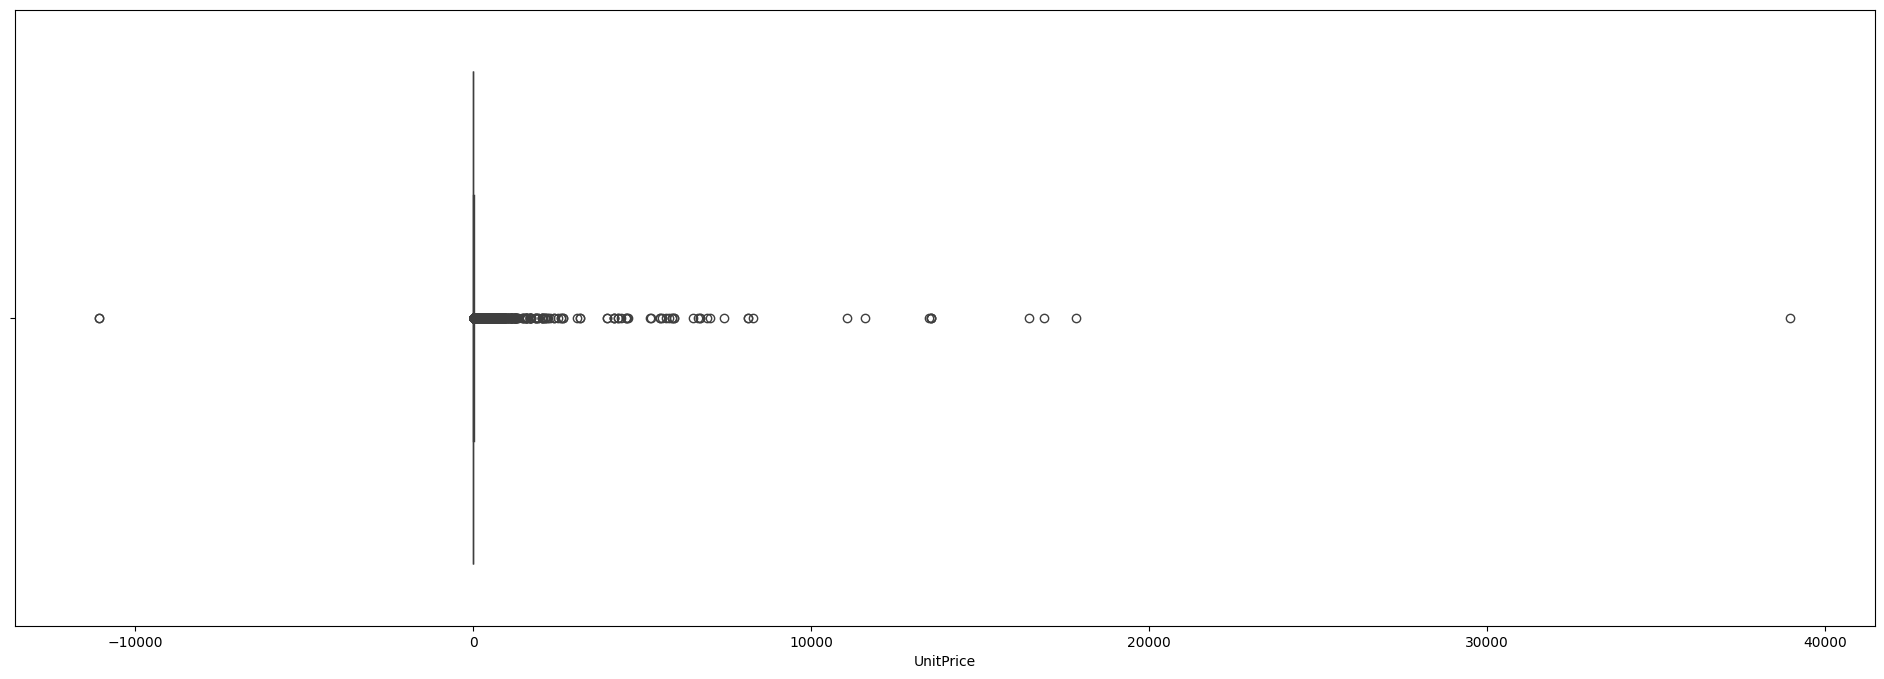

In [8]:
# find outliers in unit price, the target label
plt.figure(figsize=(24,8))
sns.boxplot(x=df['UnitPrice'])

In [9]:
# checking the top and min 5 prices
top5 = df.sort_values(by="UnitPrice", ascending = False).head(5)
min5 = df.sort_values(by="UnitPrice", ascending = True).head(5)
print(top5['UnitPrice'])
print(min5['UnitPrice'])

222681    38970.00
524602    17836.46
43702     16888.02
43703     16453.71
16356     13541.33
Name: UnitPrice, dtype: float64
299983   -11062.06
299984   -11062.06
313647        0.00
115808        0.00
516189        0.00
Name: UnitPrice, dtype: float64


In [10]:
# count of total null values
totalnull = df.isna().sum()
print(totalnull)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


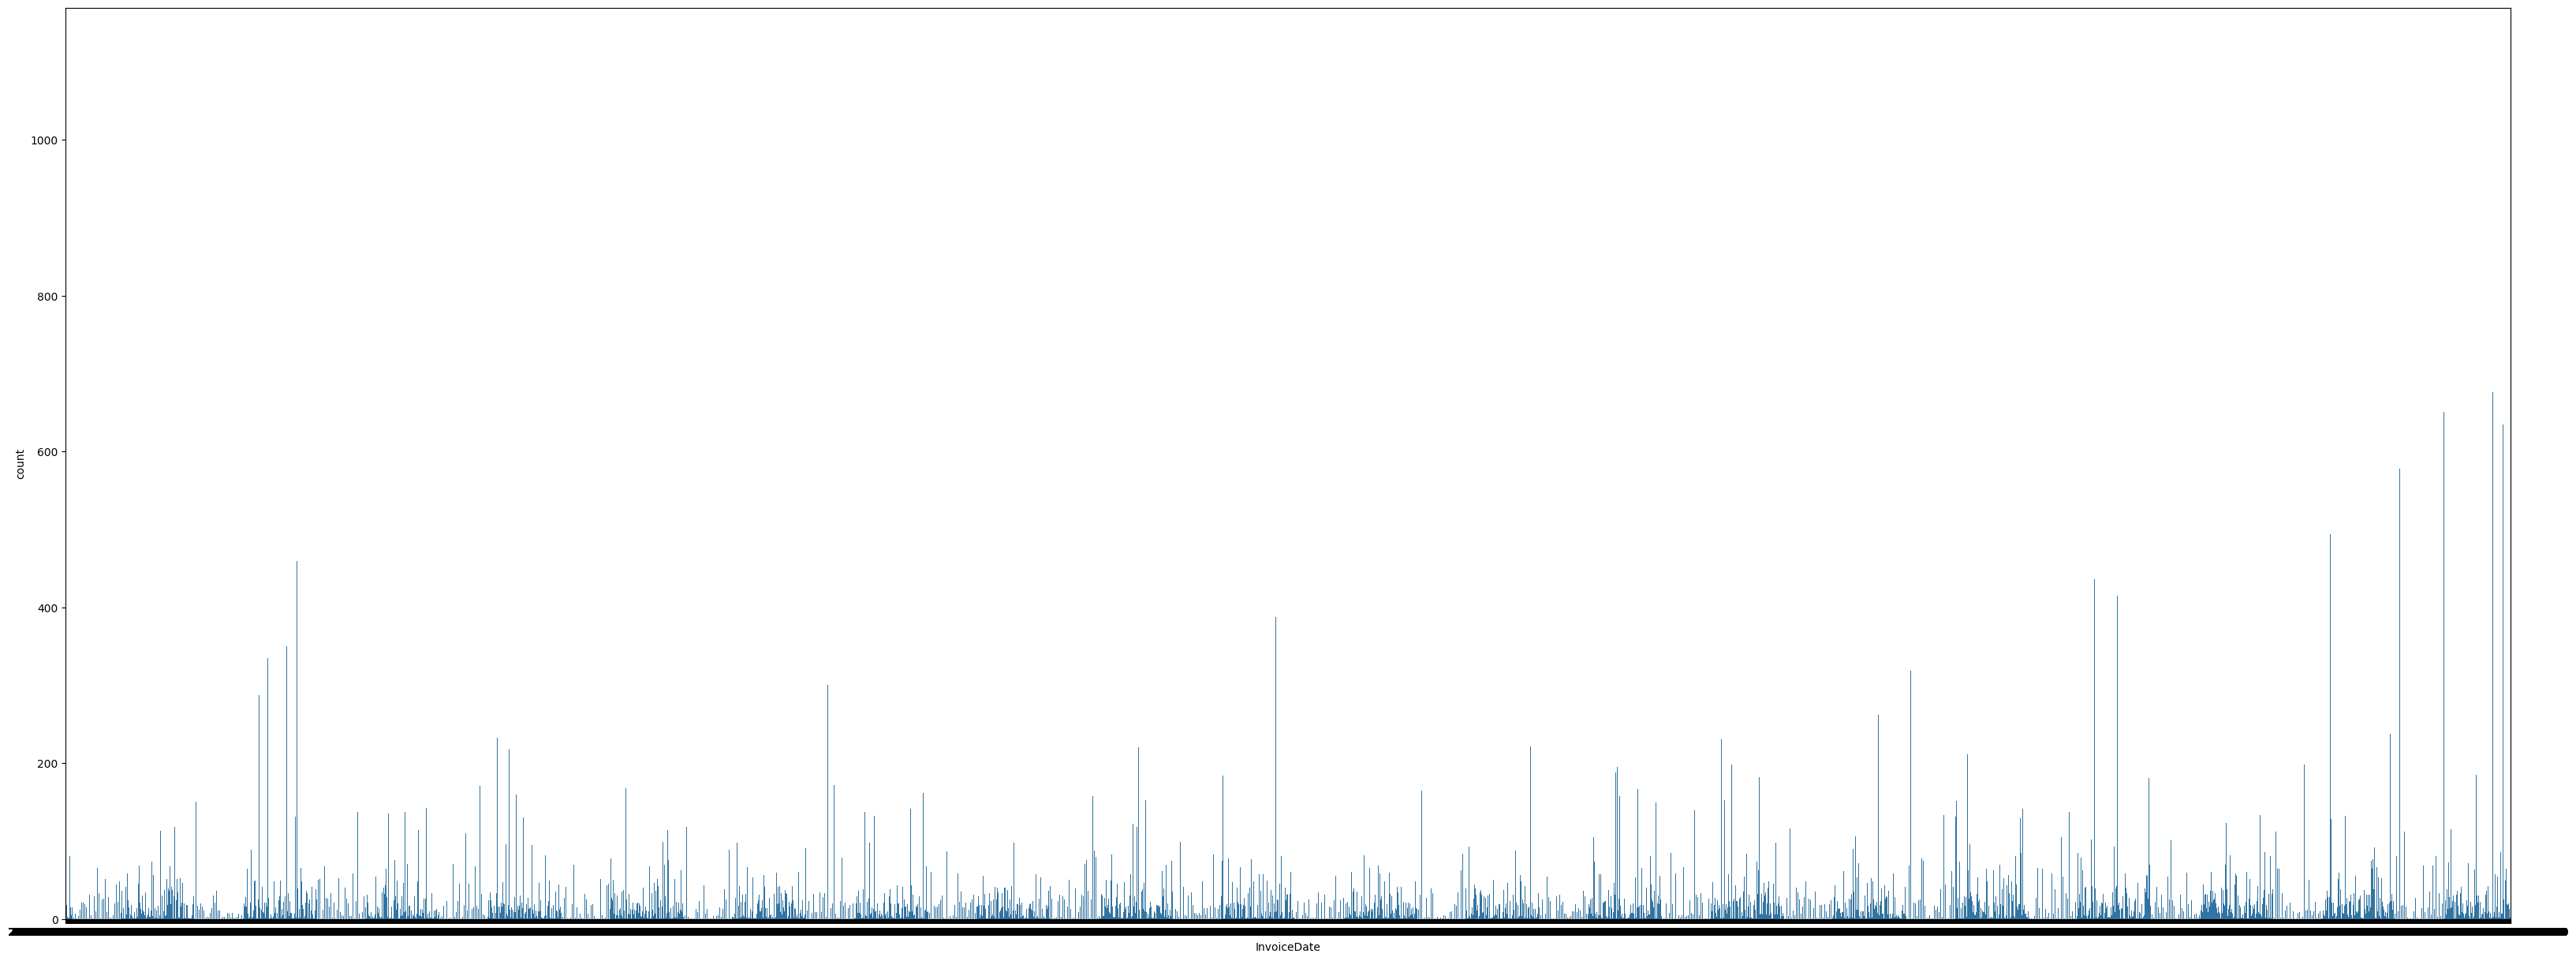

In [12]:
# chart to see sales per date
plt.figure(figsize=(40, 15))
sns.countplot(x='InvoiceDate', data=df)
plt.show()

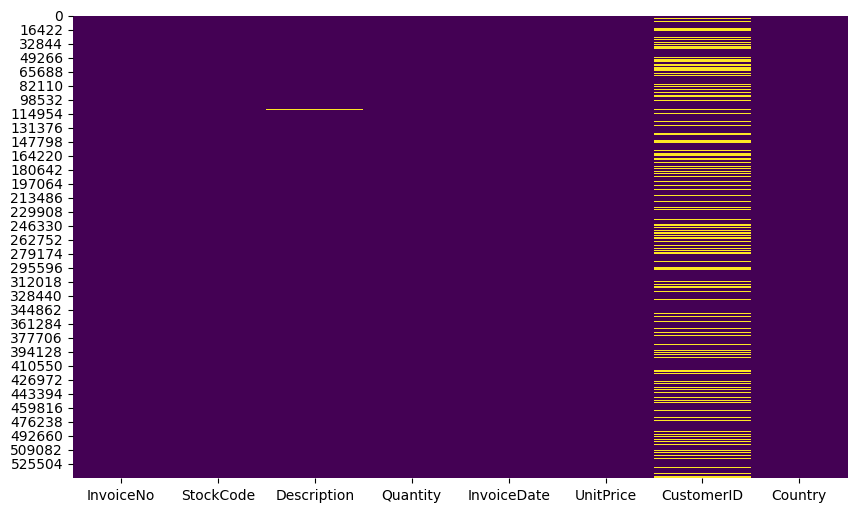

In [ ]:
# heatmap to see null values in columns
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
# types of columns
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
# checking for needed countries
FraGer = ['France', 'Germany']
in_column = df['Country'].isin(FraGer)
their_count = (in_column == True).sum()
their_count

np.int64(18052)

<Axes: xlabel='Country'>

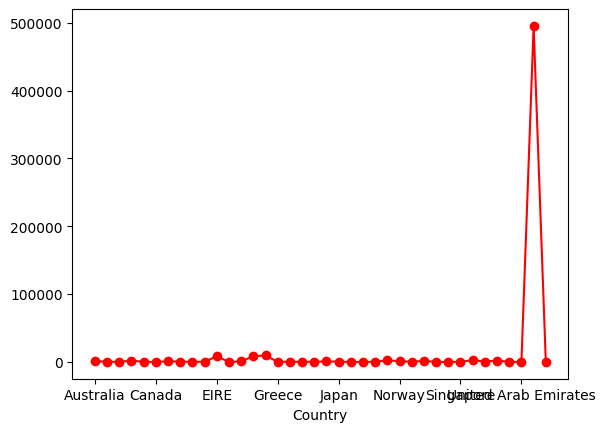

In [ ]:
# check for unique anomalies in counts
anomalies = df['Country'].value_counts().sort_index()
anomalies.plot(kind='line', color='red', marker='o')

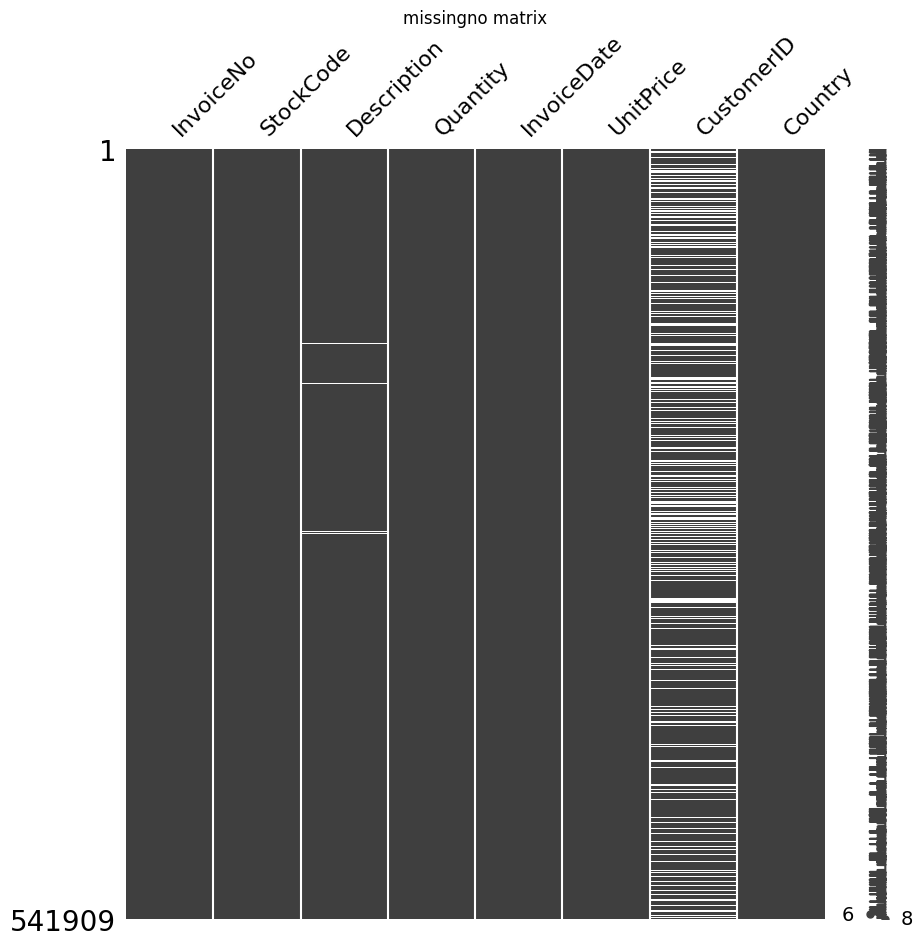

In [ ]:
# using missingno to look for missing values
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.title('missingno matrix')
plt.show()

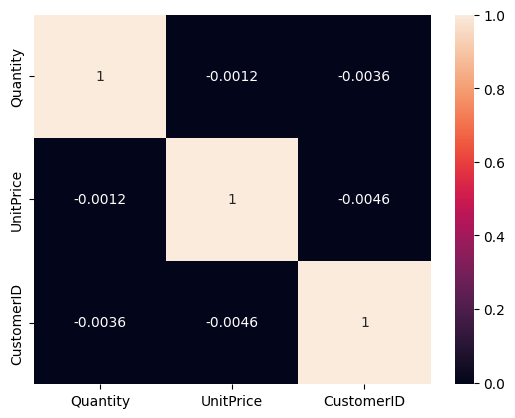

In [ ]:
# show correlation matrix to get relation between columns
corrmatrix =  df.select_dtypes(include=['number']).corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [ ]:
# start removing nulls and duplicates to start proper analysis

# remove duplicates
df = df.drop_duplicates()
# remove nulls
df = df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 1) Quantity range by country

<Axes: xlabel='Country', ylabel='Quantity'>

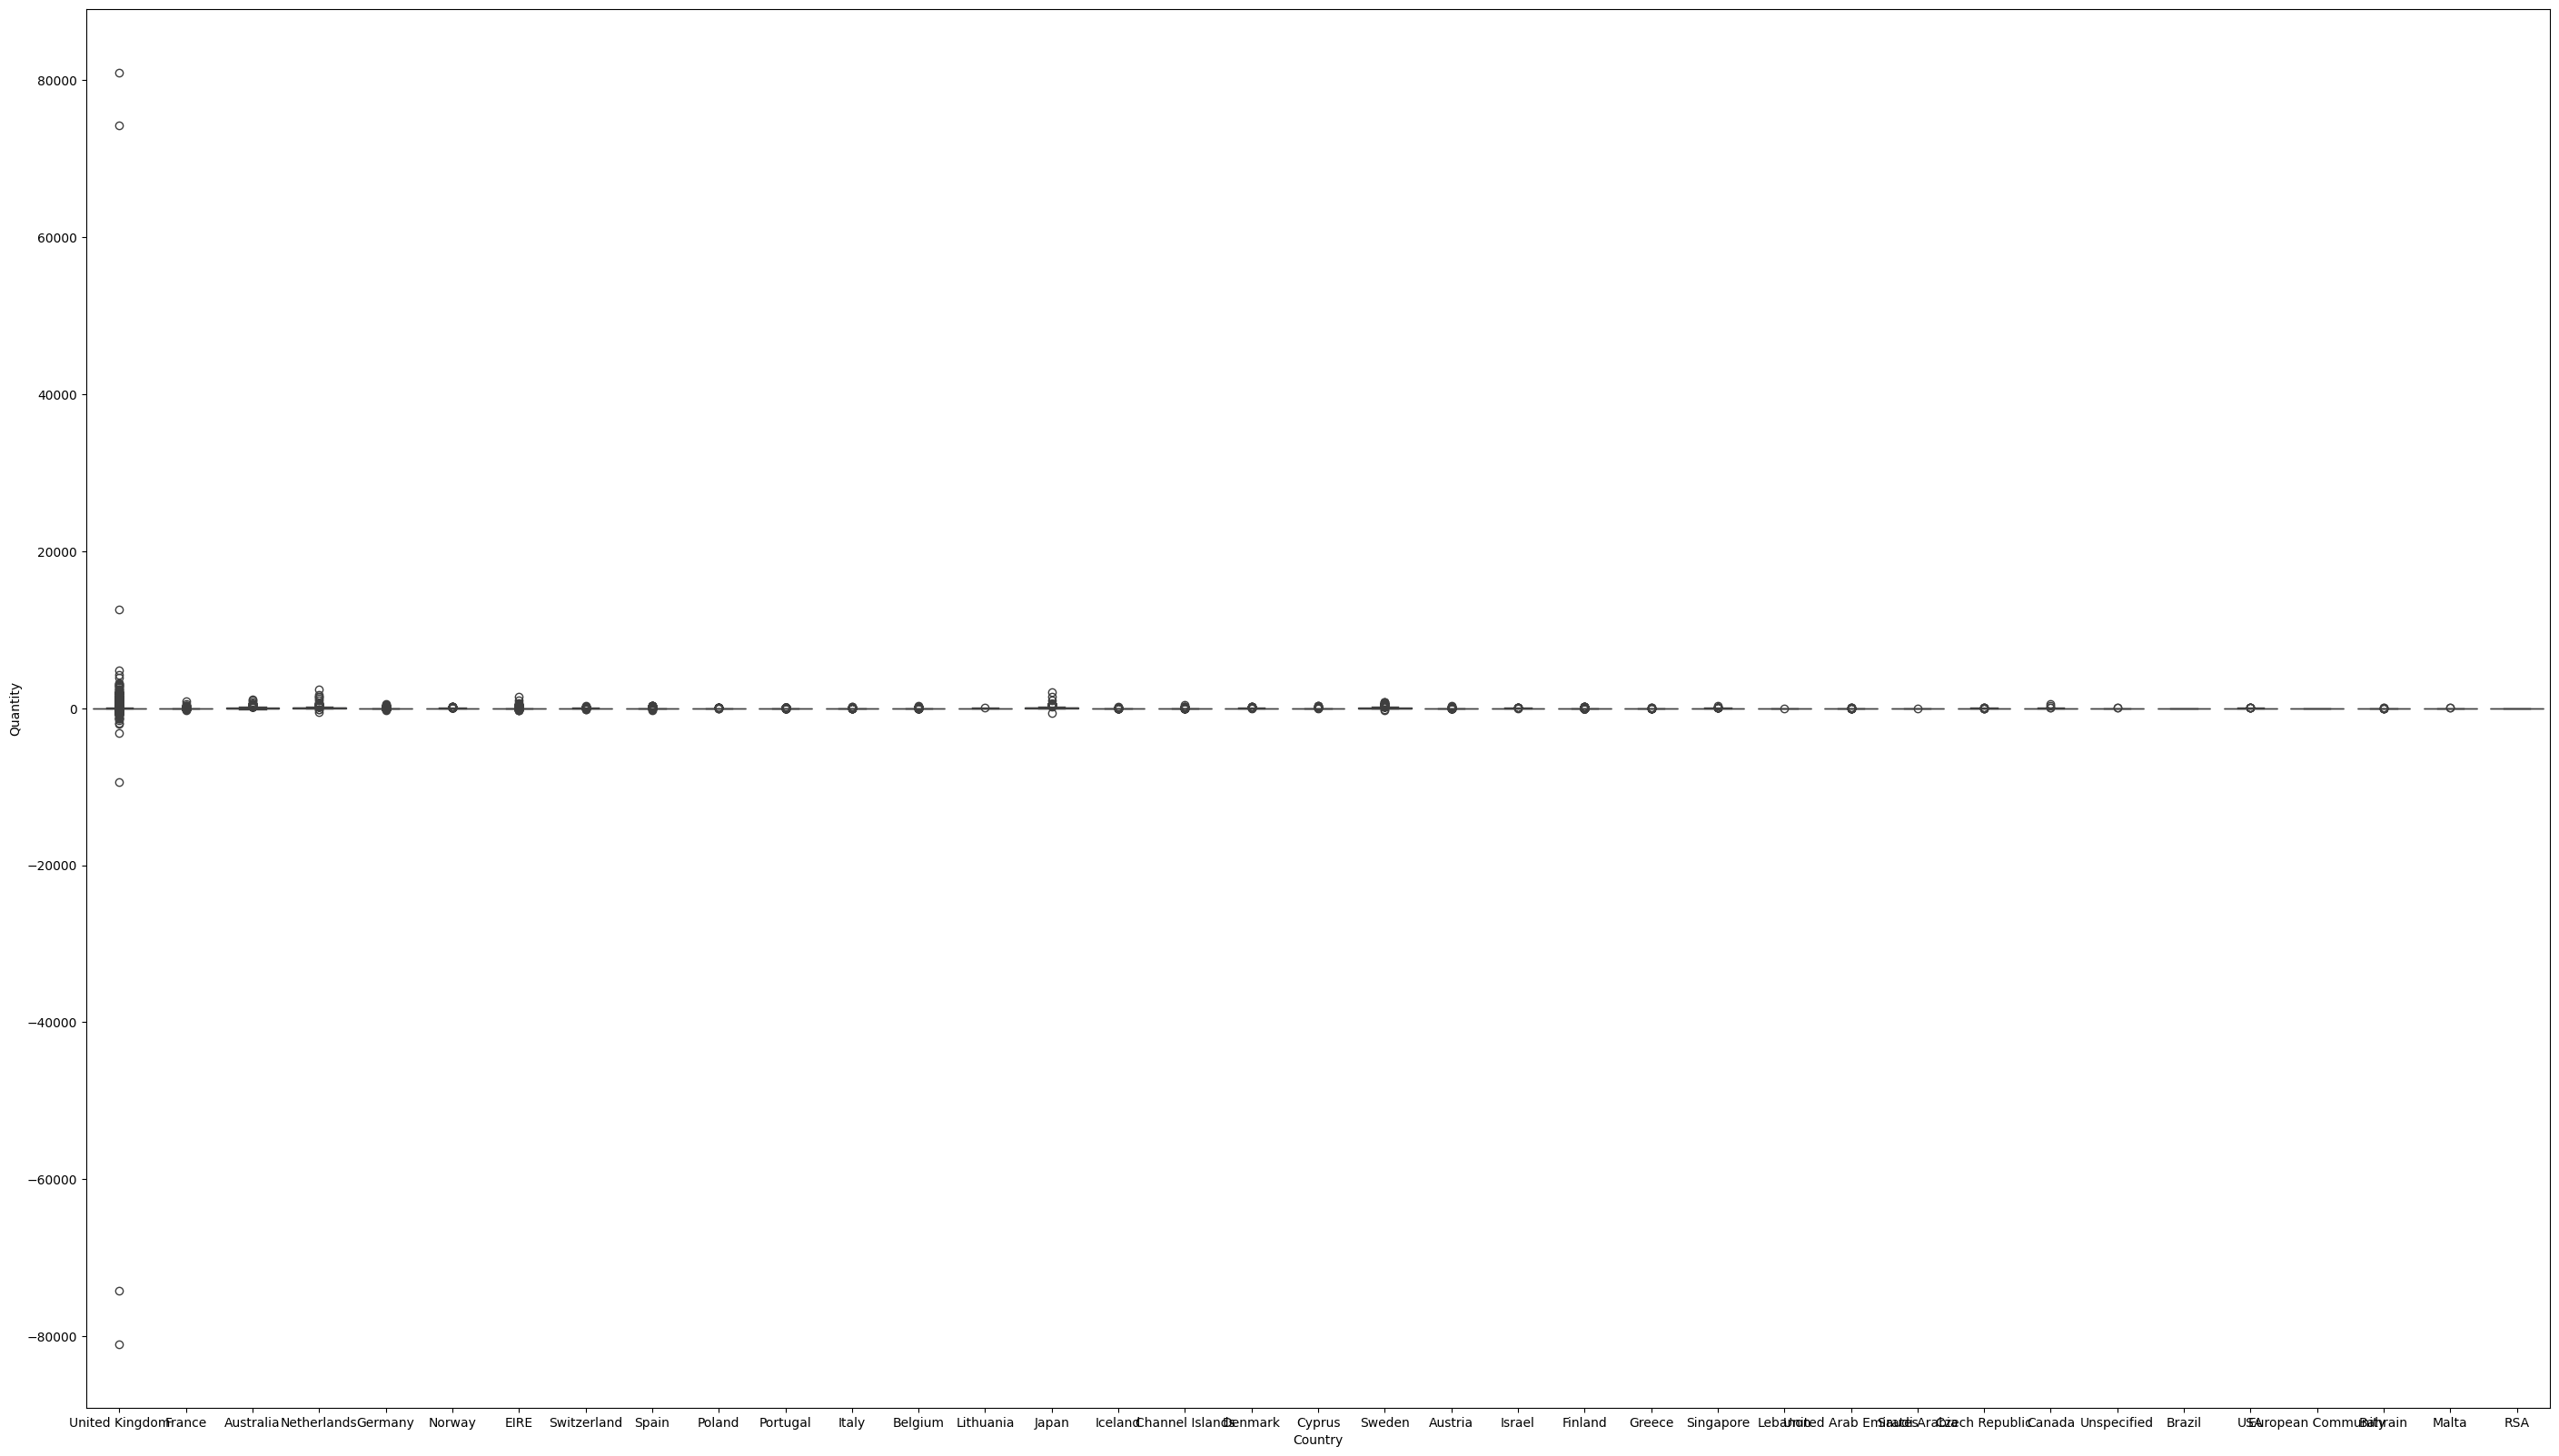

In [ ]:
plt.figure(figsize=(35,20))
sns.boxplot(x='Country', y='Quantity', data=df)

<Axes: xlabel='Country', ylabel='Quantity'>

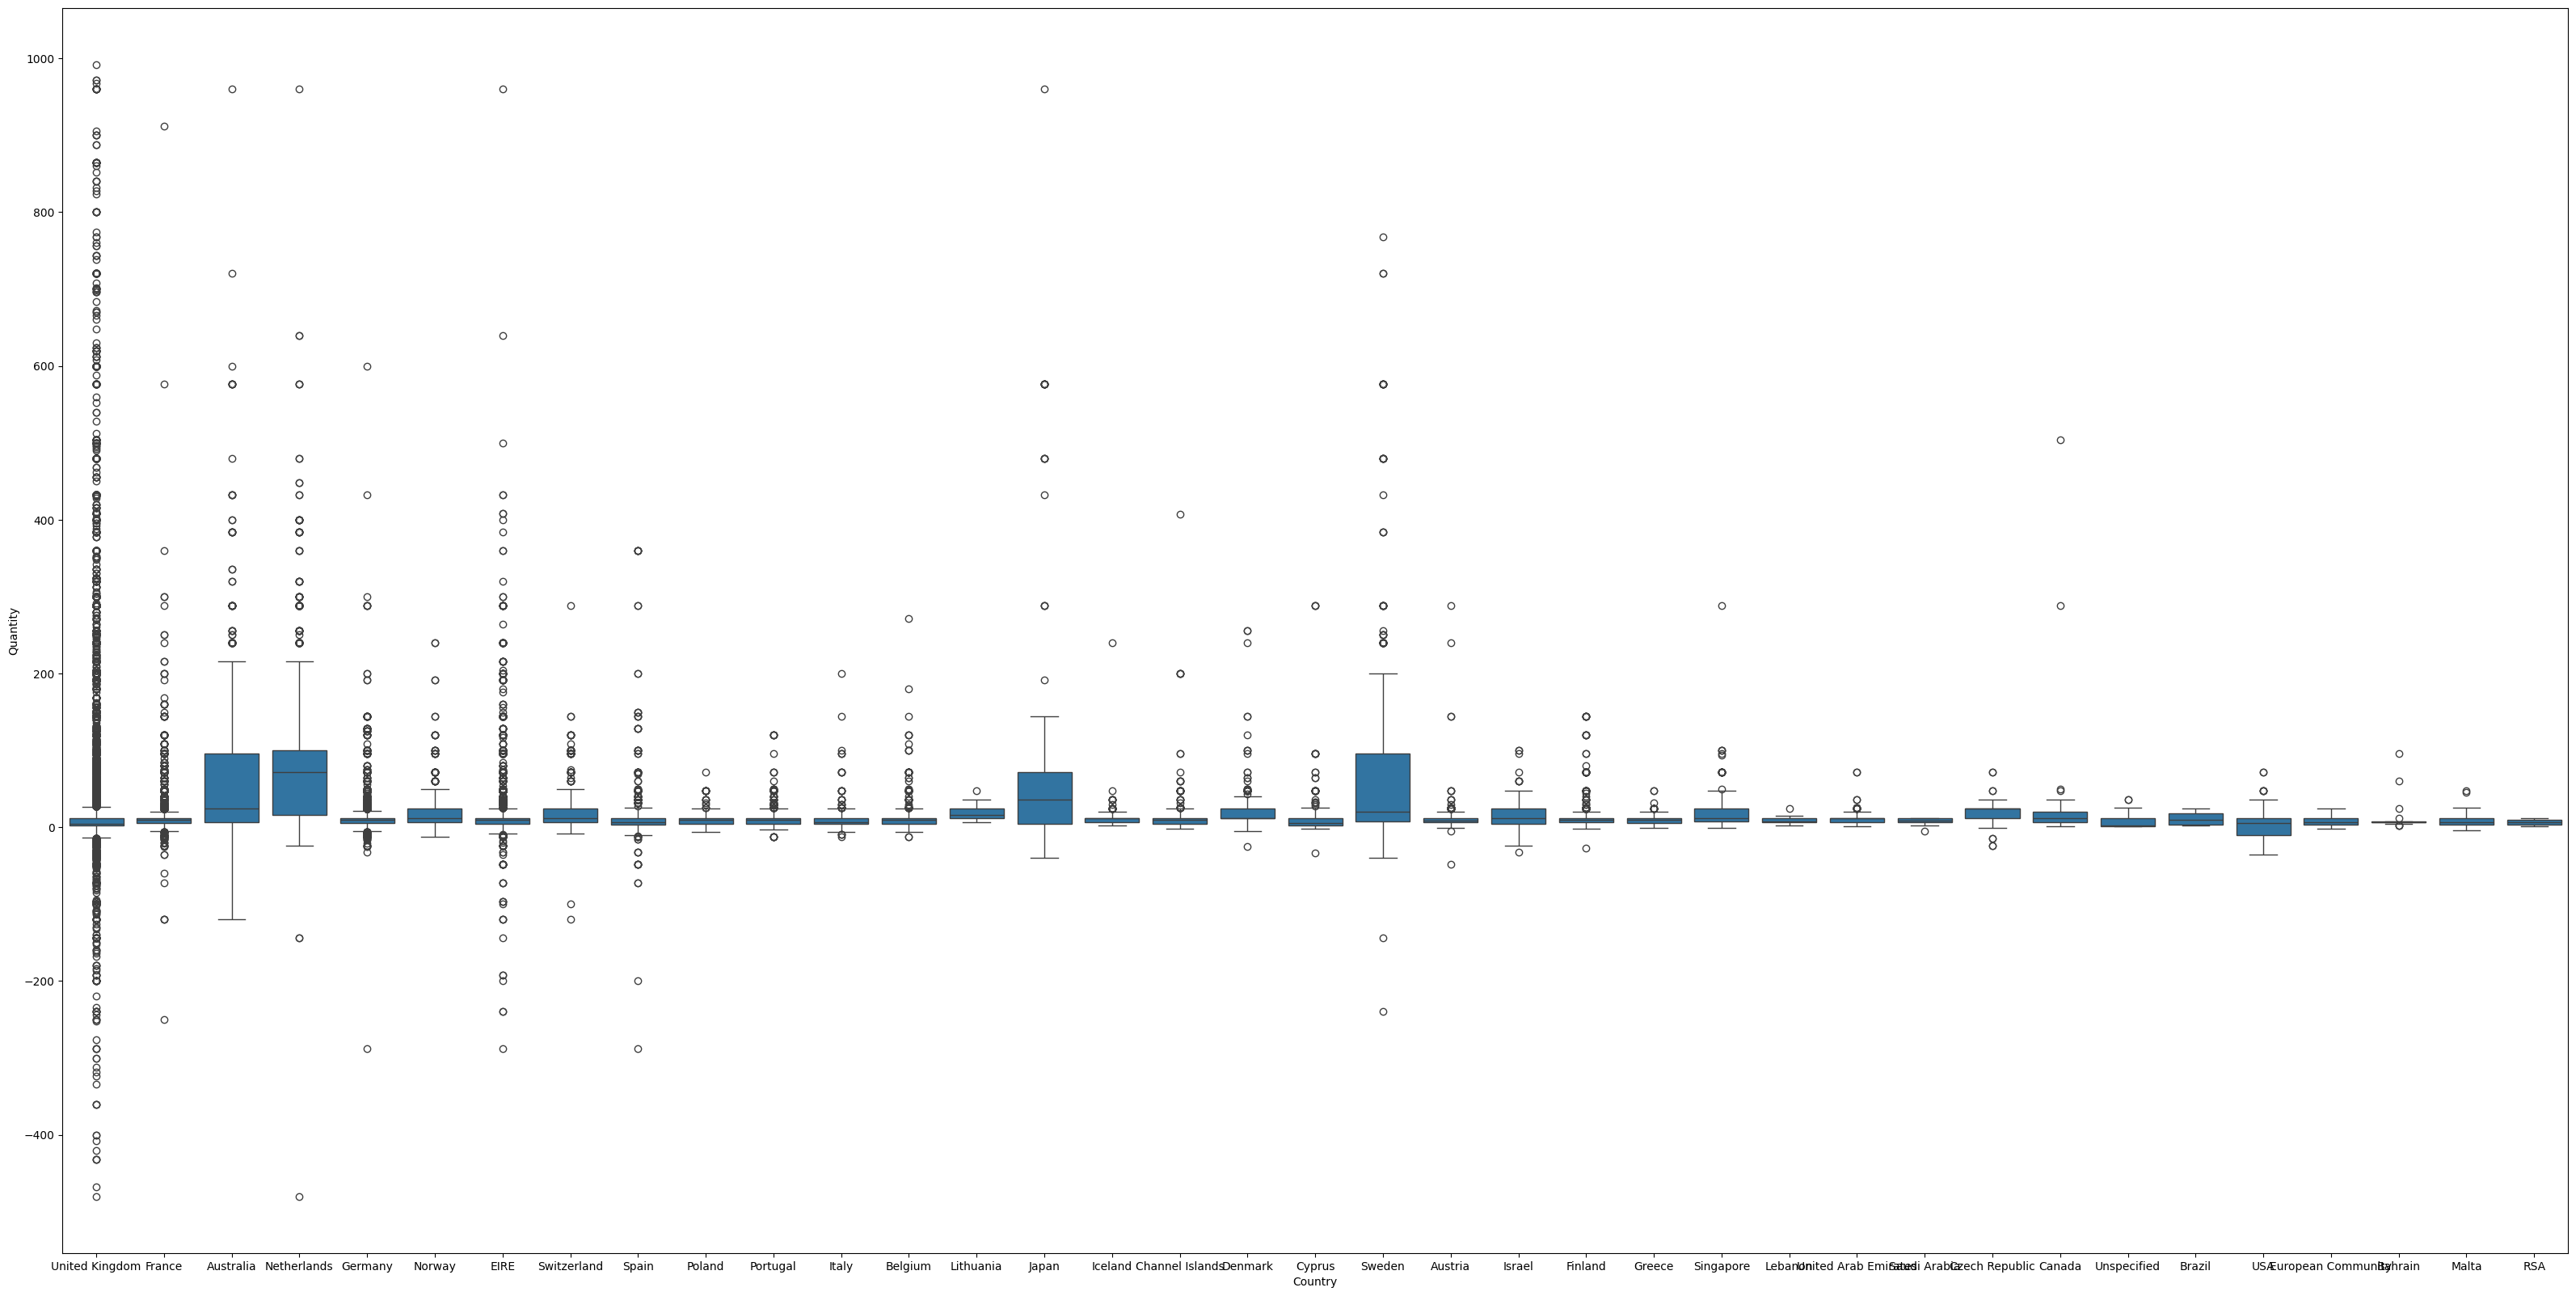

In [ ]:
# remove outliers to have a more clear chart
dfqty_outlier = df[df['Quantity'] < 1000]
dfqty_outlier = dfqty_outlier[dfqty_outlier['Quantity'] > -500]

plt.figure(figsize=(40,20))
sns.boxplot(x='Country', y='Quantity', data=dfqty_outlier)

# 2) Range of quantity by year

In [ ]:
# turn date column to date type format, and extract it by month and year
# in this chart, we need the year date columns, in a later chart we will use Month date column
df['InvoiceDate2'] = pd.to_datetime(df['InvoiceDate'])
df['Invoice Date month'] = df['InvoiceDate2'].dt.month
df['Invoice date year'] = df['InvoiceDate2'].dt.year

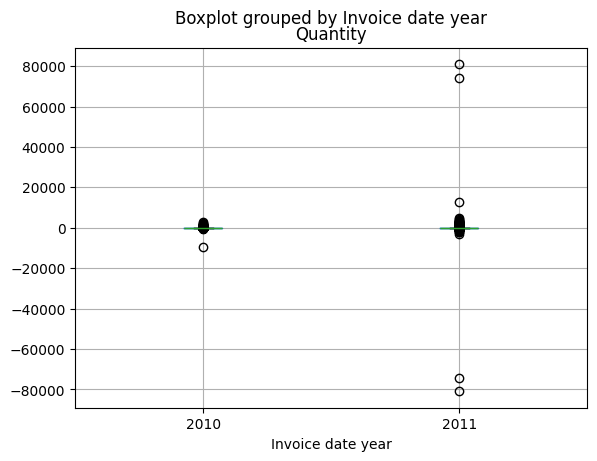

In [ ]:
df.boxplot(column=['Quantity'], by='Invoice date year')
plt.show()

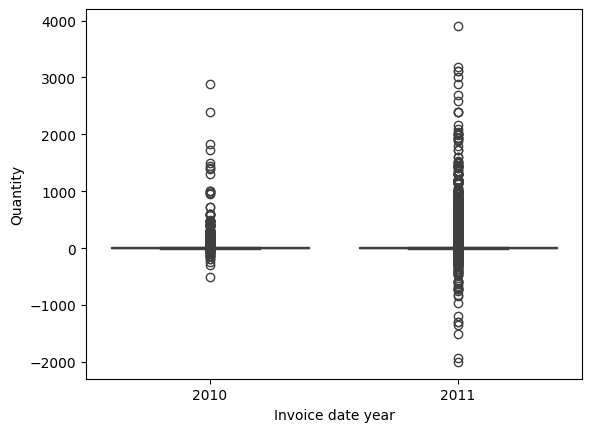

In [ ]:
# remove outliers to get a better chart

dfqty_year_outlier = df[df['Quantity'] < 4000]
dfqty_year_outlier = dfqty_year_outlier[dfqty_year_outlier['Quantity'] > -3000]
sns.boxplot(x='Invoice date year', y='Quantity', data=dfqty_year_outlier)
plt.show()

# 3) frequency of UK invocies by year

([<matplotlib.patches.Wedge at 0x7e316cb47d10>,
 [Text(-1.0754336223146217, 0.2311763915179308, '2011'),
  Text(1.0754336425247004, -0.23117629750053292, '2010')],
 [Text(-0.5866001576261572, 0.12609621355523495, '93.3%'),
  Text(0.5866001686498366, -0.12609616227301795, '6.7%')])

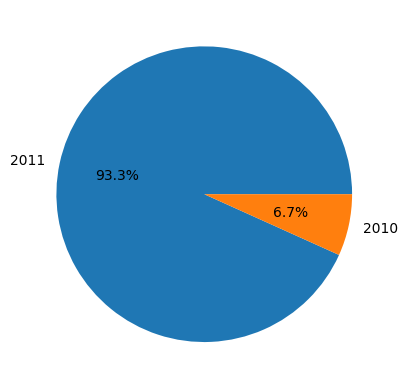

In [ ]:
dfUK = df[df['Country'] == 'United Kingdom']
datacount = dfUK['Invoice date year'].value_counts()
plt.pie(datacount, labels=datacount.index, autopct='%1.1f%%')

# 4) Range of price per year

<Axes: xlabel='Invoice date year', ylabel='UnitPrice'>

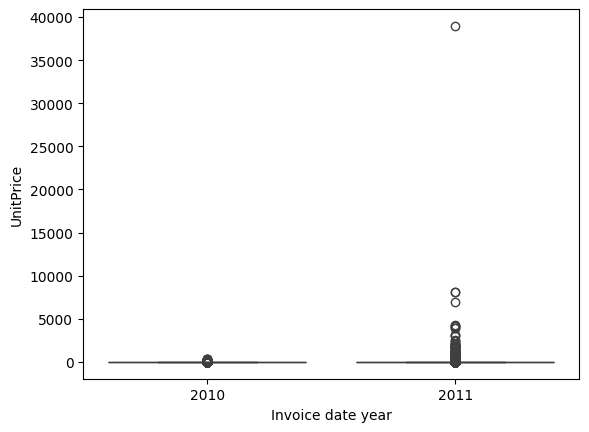

In [ ]:
sns.boxplot(x='Invoice date year', y='UnitPrice', data=df)

<Axes: xlabel='Invoice date year', ylabel='UnitPrice'>

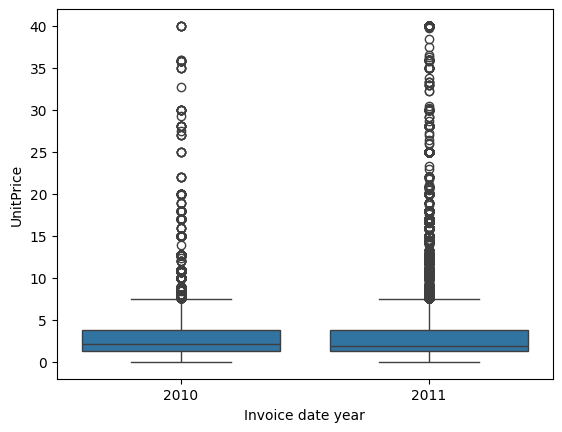

In [ ]:
# remove outliers for better visualizaiton

df_price_year = df[df['UnitPrice'] < 40]
sns.boxplot(x='Invoice date year', y='UnitPrice', data=df_price_year)

# 5) Percentage of countries frequency in the dataset

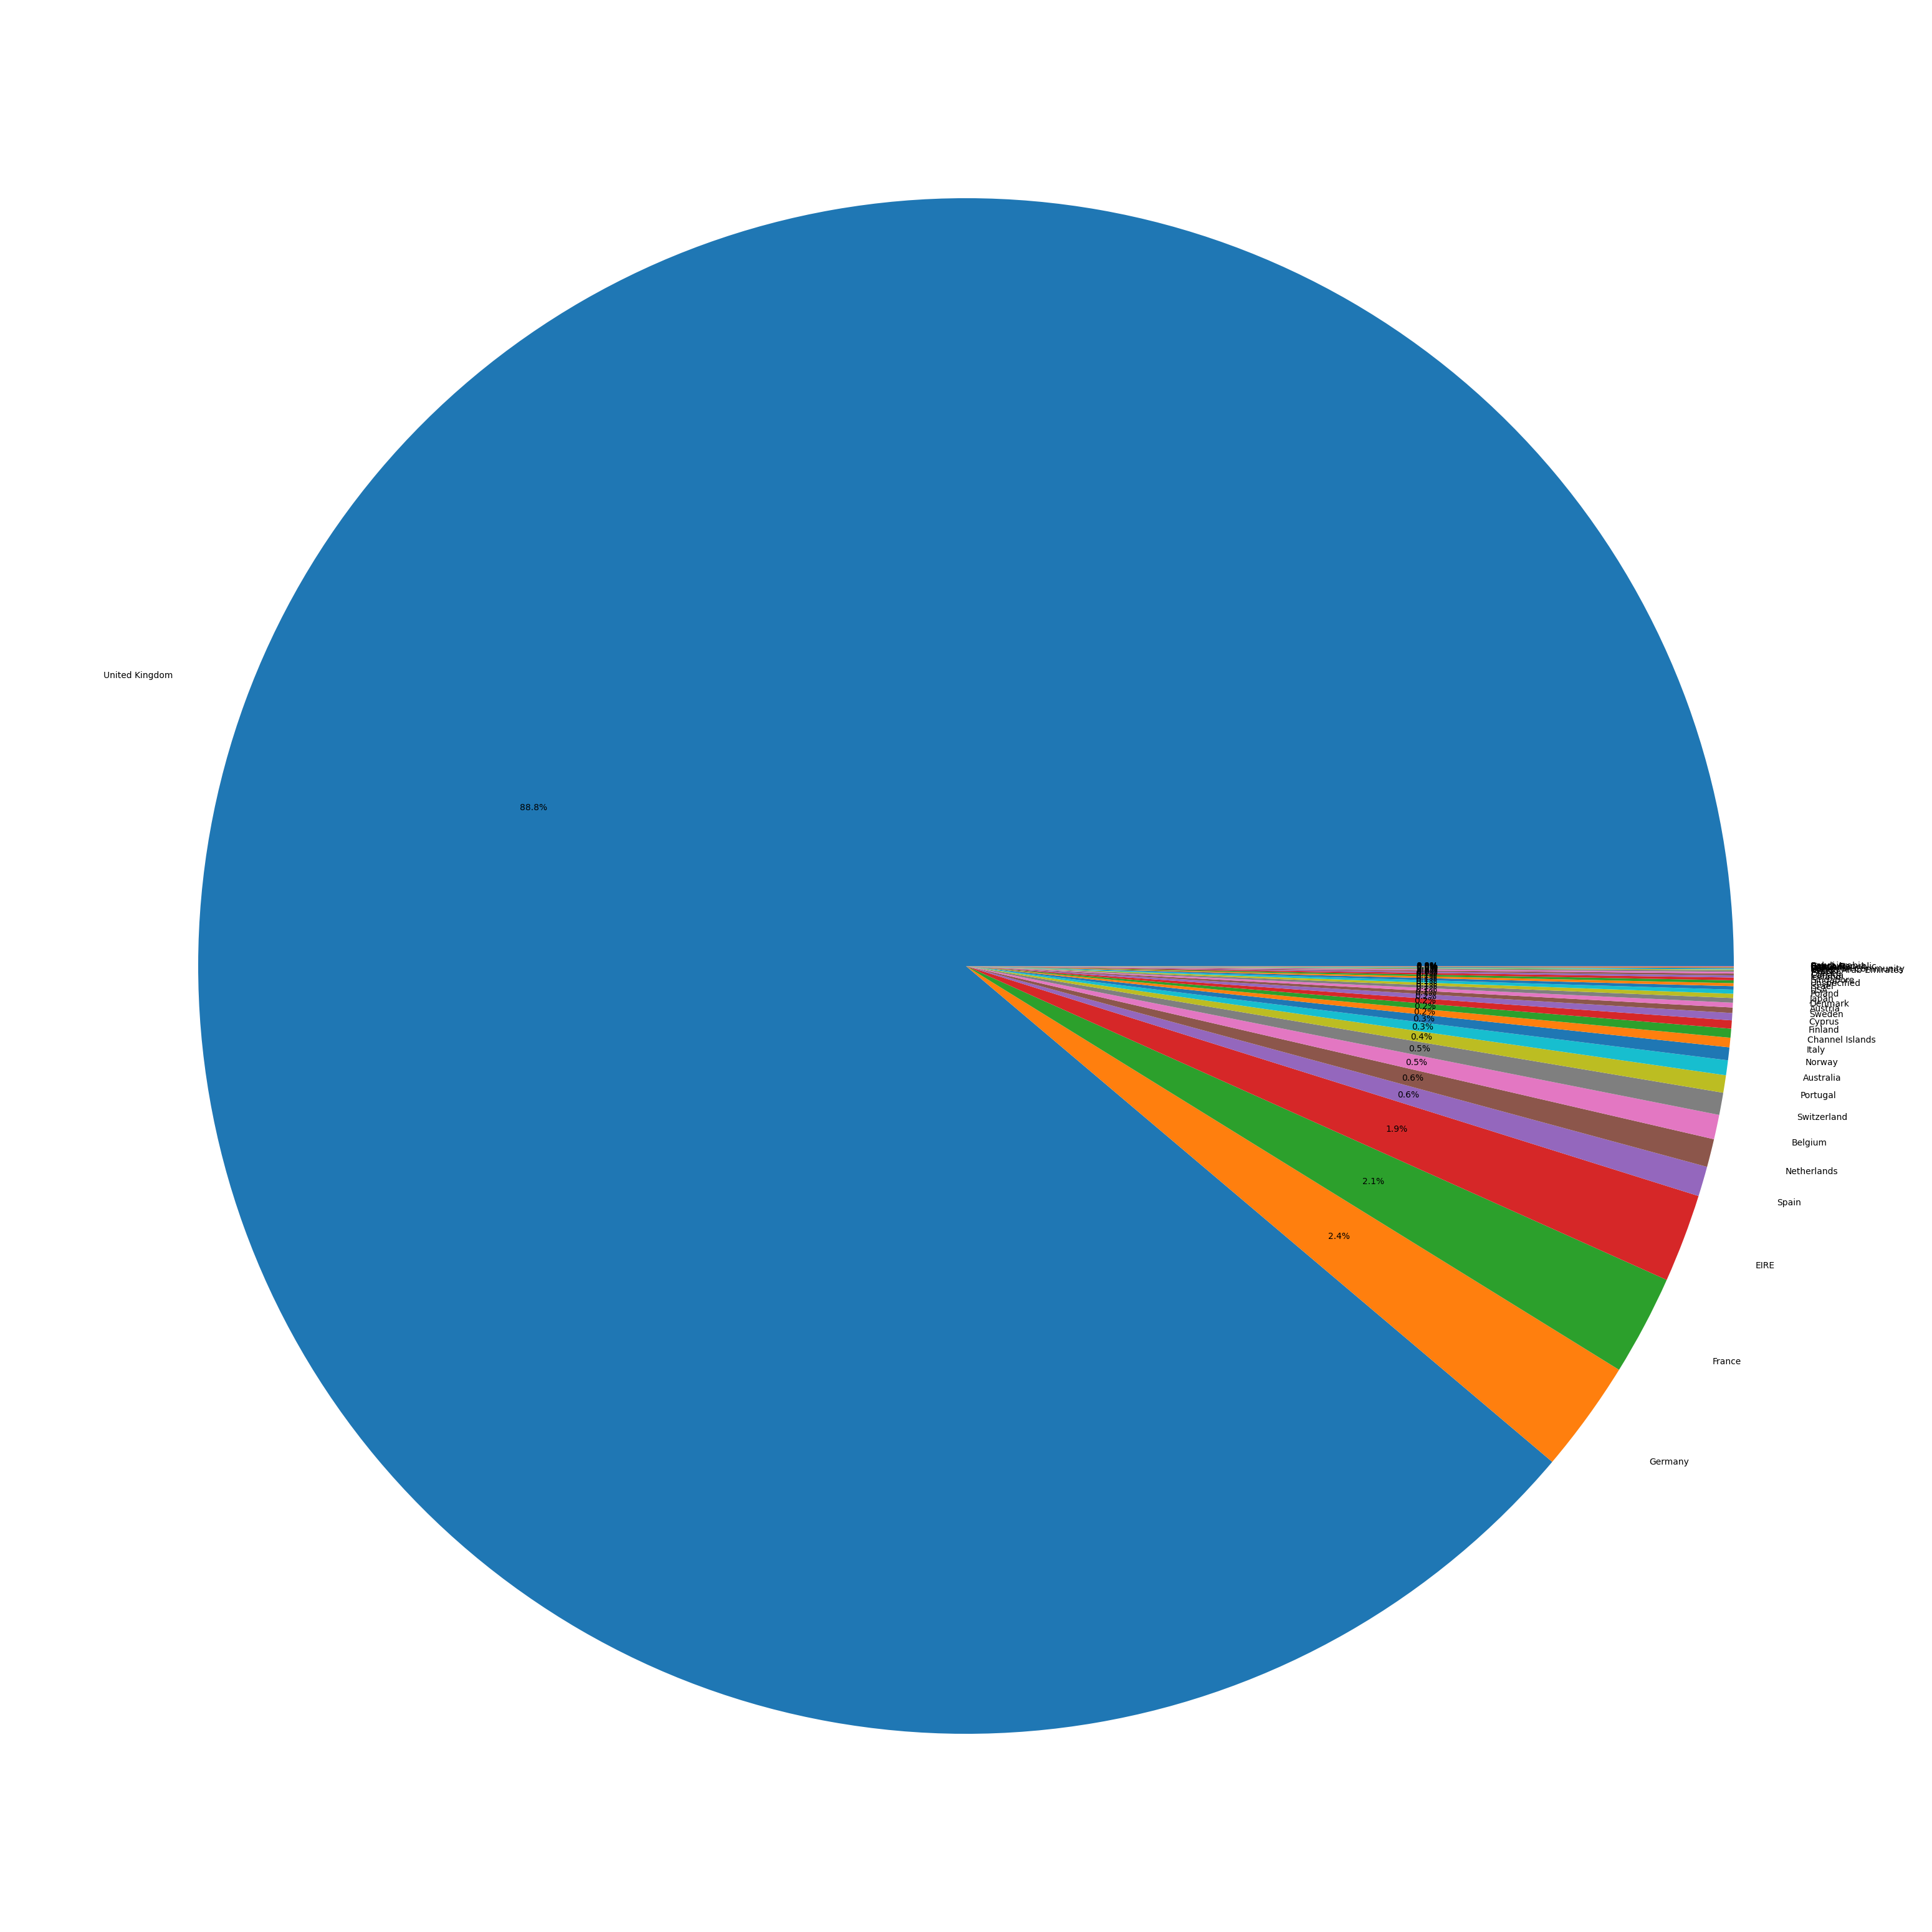

In [ ]:
a = df['Country'].value_counts()*100
plt.figure(figsize=(40,40))
plt.pie(a, labels=a.index, autopct='%1.1f%%')
plt.show()

# 6) Range of Unit price by country

<Axes: xlabel='Country', ylabel='UnitPrice'>

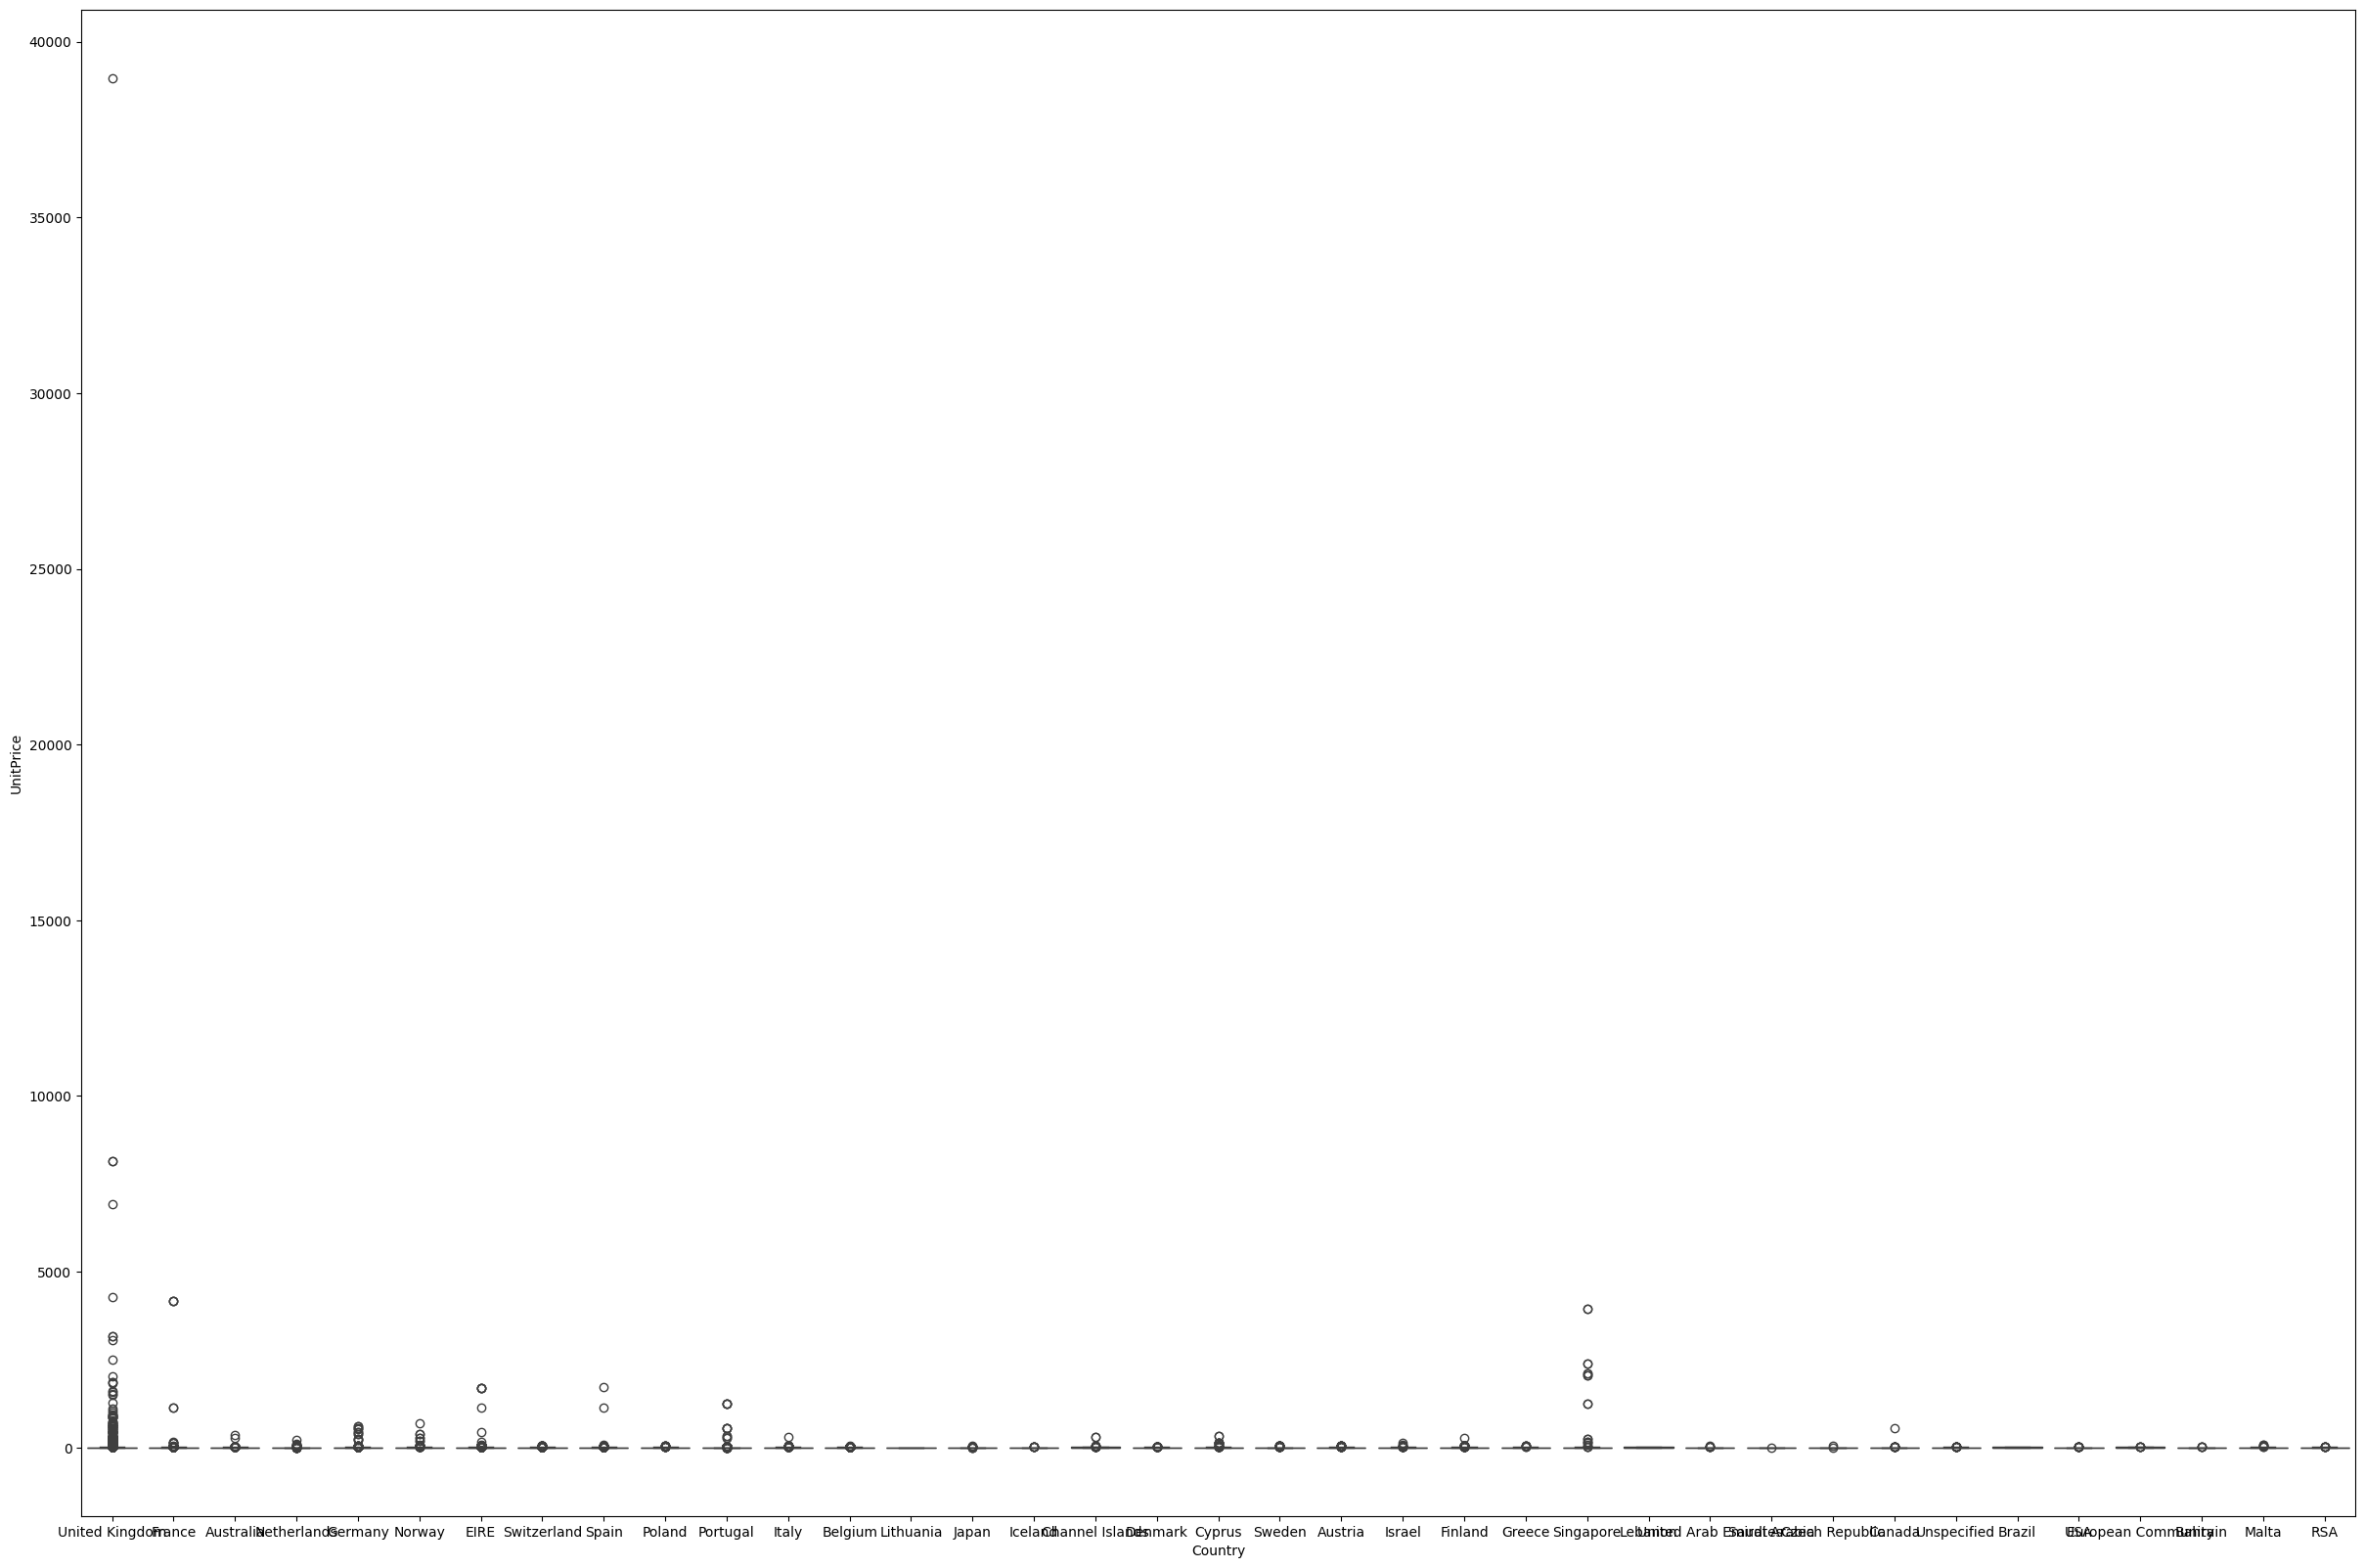

In [ ]:
plt.figure(figsize=(30,20))
sns.boxplot(x='Country', y='UnitPrice', data=df)

<Axes: xlabel='Country', ylabel='UnitPrice'>

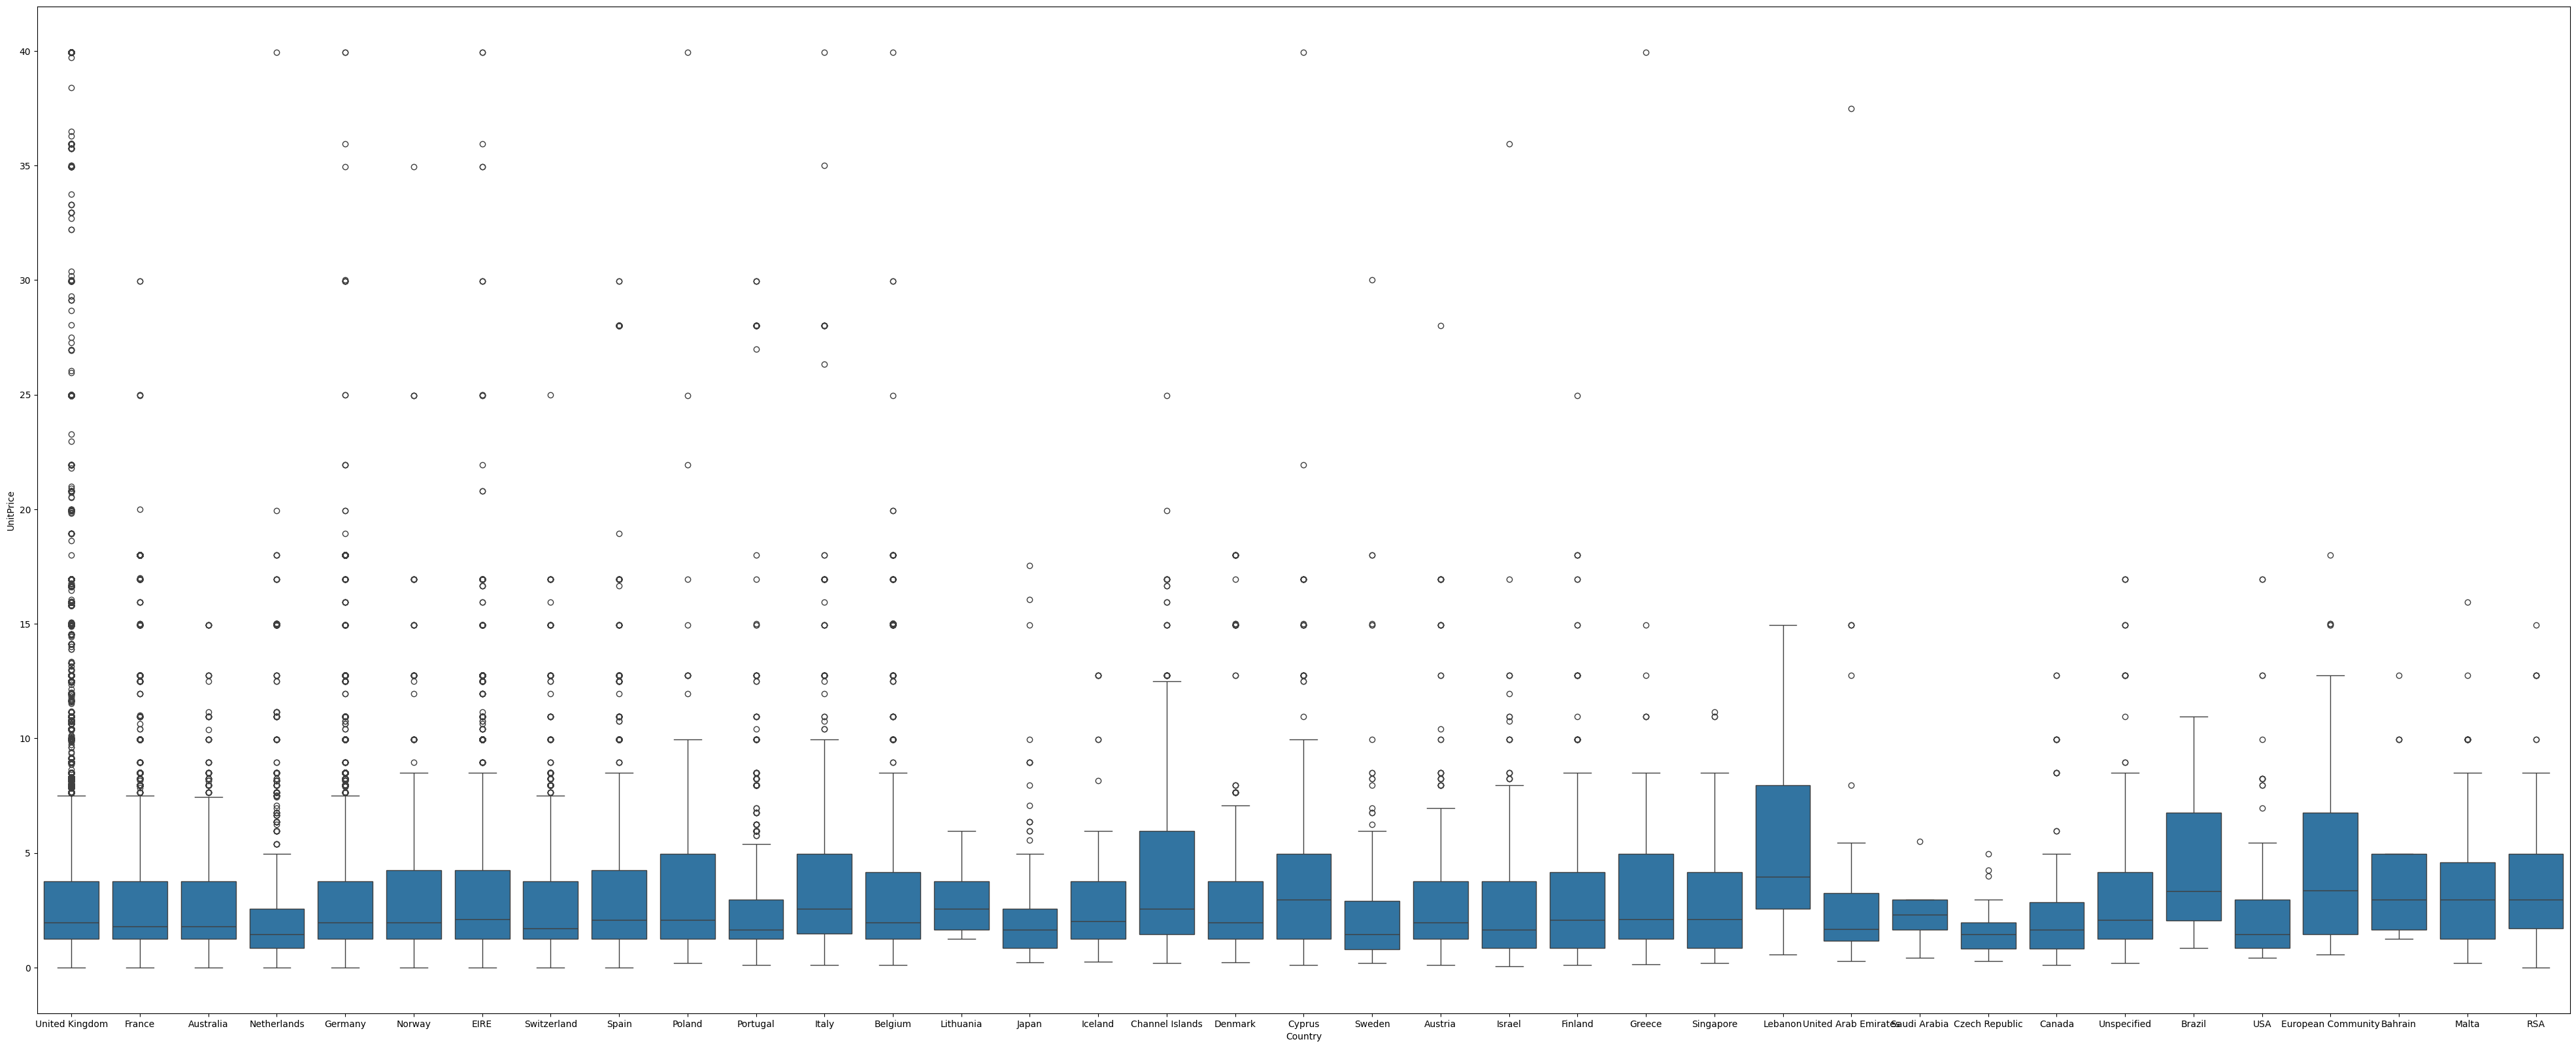

In [ ]:
# remove outliers from Unit price column forn better chart
df_price = df[df['UnitPrice'] < 40]

plt.figure(figsize=(50,20))
sns.boxplot(x='Country', y='UnitPrice', data=df_price)

# 7) Total Price per month

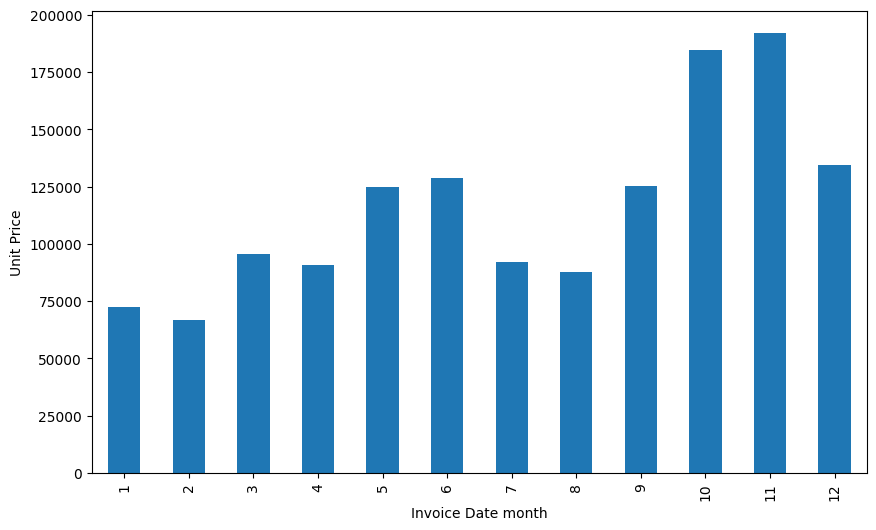

In [ ]:
# bar chart
result = df.groupby('Invoice Date month')['UnitPrice'].sum()
result.plot(kind='bar', figsize=(10,6))
plt.xlabel('Invoice Date month')
plt.ylabel('Unit Price')
plt.show()

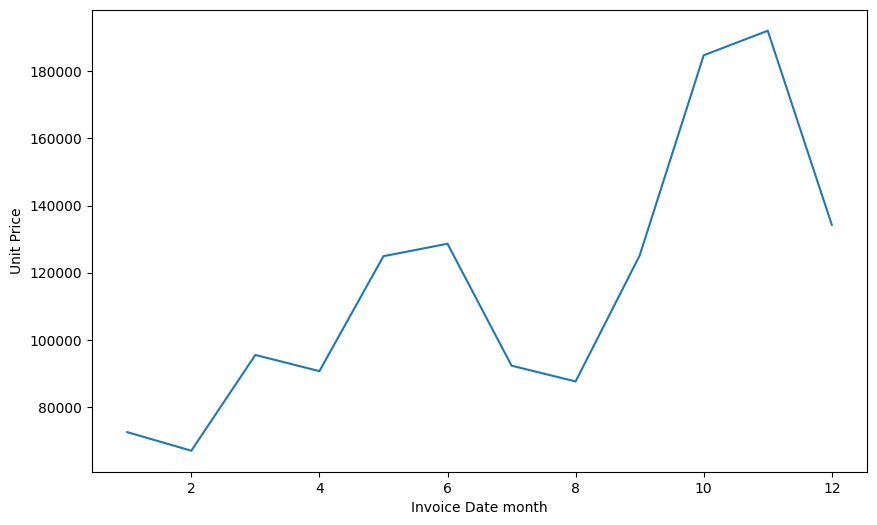

In [ ]:
# do it with line chart
result.plot(kind='line', figsize=(10,6))
plt.xlabel('Invoice Date month')
plt.ylabel('Unit Price')
plt.show()

Dataset reference:
Chen, D. (2015). Online Retail [Dataset]. UCI Machine Learning Repository. Available at: https://doi.org/10.24432/C5BW33, (Accessed: 04/04/2025)